In [3]:
using WAV
using FFTW
using Plots
#import DSP: unwrap

In [12]:
bird = wavread("bird.wav")[1][:,1]
birdfs = wavread("bird.wav")[2];

In [43]:
function freqchanger(signal, shift)
    fft_signal = fft(signal)
    amplitude = abs.(fft_signal)
    angle_signal = angle.(fft_signal)
    N = length(fft_signal)
    amp1 = amplitude[2:Int(N/2)+1]                
    angle1 = angle_signal[2:Int(N/2)+1] 
    amp2 = amplitude[Int(N/2)+2:end]
    angle2 = angle_signal[Int(N/2)+2:end] 
    amp1shift   = [zeros(shift); amp1[1:end-shift]]
    angle1shift = [zeros(shift); angle1[1:end-shift]]
    amp2shift   = [amp2[shift+1:end]; zeros(shift)]
    angle2shift = [angle2[shift+1:end]; zeros(shift)]
    amplitude_new = [amplitude[1]; amp1shift; amp2shift]
    angle_new  = [angle_signal[1]; angle1shift; angle2shift]
    x = amplitude_new .* cos.(angle_new)
    y = amplitude_new .* sin.(angle_new)
    fft_new = x + im*y
    return ifft(fft_new)
end
    
    

freqchanger (generic function with 1 method)

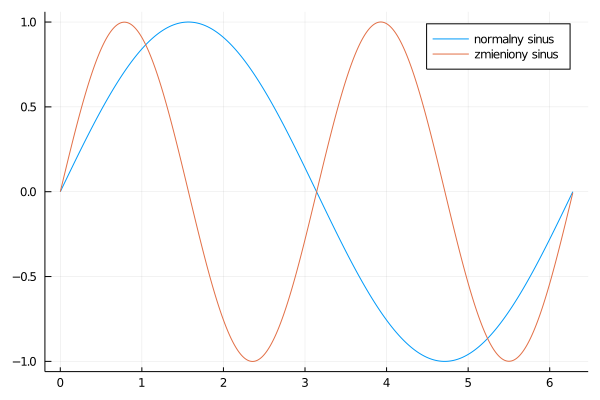

In [44]:
t = range(0, 2pi, length = 1000)
f = sin.(t)
plot(t, f, label="normalny sinus")
new_f = real(freqchanger(f, 1))
plot!(t, new_f, label="zmieniony sinus")

In [45]:
newbird = freqchanger(bird, 1);

In [46]:
plot(real(newbird), label="nowe")
plot!(bird, label="stare")

In [51]:
wavwrite(real(newbird), "nowyptaszek.wav")

In [52]:
wavplay("nowyptaszek.wav")

In [48]:
wavplay("bird.wav")